# Heart Attack Analysis and Prediction

## What will you learn from this project?
* EDA 
* Handling with Missing Values
* Categoric and Numeric Features
* Standardization
* Visualization with Seaborn (Box - Swarm - Cat - Correlation Plot Analysis)
* Outlier Detection
* Modelling and Tuning Machine Learning Model

## Introduction
##### What is heart attack? 
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of heart attack.

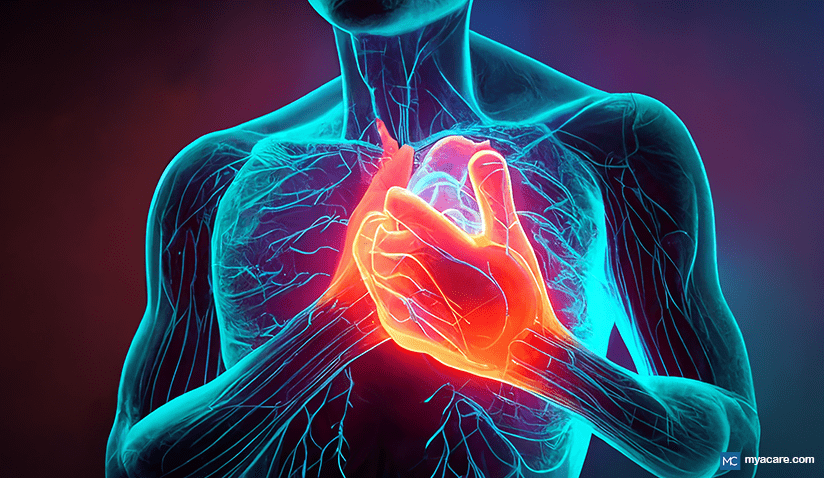

## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyze Data](#3)
4. [Missing Value Analysis](#4)
5. [Unique Value Analysis](#5)
6. [Categorical Feature Analysis](#6)
7. [Numeric Feature Analysis](#7)
8. [Standardization](#8)
9. [Box Plot Analysis](#9)
10. [Swarm Plot Analysis](#10)
11. [Cat Plot Analysis](#11)
12. [Correlation Analysis](#12)
13. [Outlier Detection](#13)
14. [Modelling](#14)
    1. [Encoding Categorical Columns](#14.1)
    1. [Scaling](#14.2)
    1. [Train-Test Split](#14.3)
    1. [Logistic Regression](#14.4)
    1. [Logistic Regression Hyperparameter Tuning](#14.5)

<a id='1'></a>
## 1- Python Libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.model_selection import train_test_split, GridSearchCV #for parametre tuning
from sklearn.metrics import accuracy_score, roc_curve #evaluation metrics

import warnings
warnings.filterwarnings("ignore")

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


<a id='2'></a>
## 2- Data Content
* **Age :** Age of the patient
* **Sex :** Sex of the patient
* **exang:** exercise induced angina (1 = yes; 0 = no)
* **ca:** number of major vessels (0-3)
* **cp :** Chest Pain type chest pain type
    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps :** resting blood pressure (in mm Hg)
* **chol :** cholestoral in mg/dl fetched via BMI sensor
* **fbs :** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg :** resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach :** maximum heart rate achieved
* **target :** 0= less chance of heart attack 1= more chance of heart attack

<a id='3'></a>
## 3- Read and Analyze Data

In [2]:
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#describe basic statistics 
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id='4'></a>
## 4- Missing Value Analysis

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id='5'></a>
## 5- Unique Value Analysis

In [6]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
#how many unique values are there?
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id='6'></a>
## 6- Categorical Feature Analysis

In [9]:
#put together categorical features
categorical_features = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

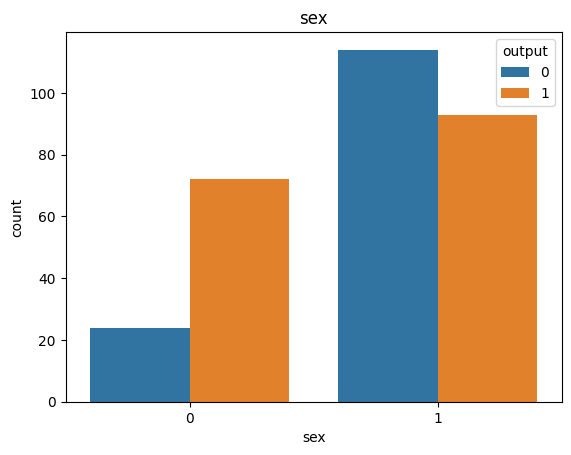

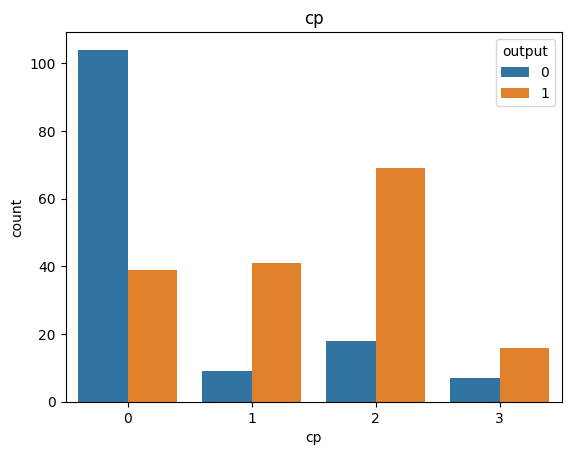

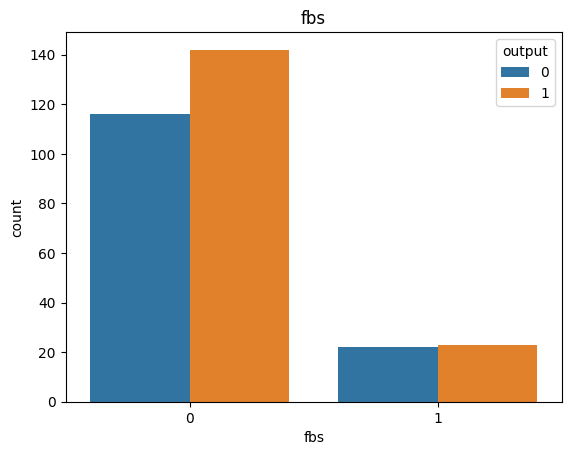

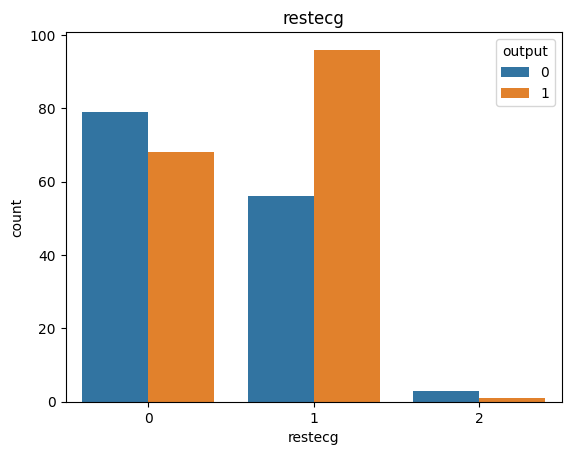

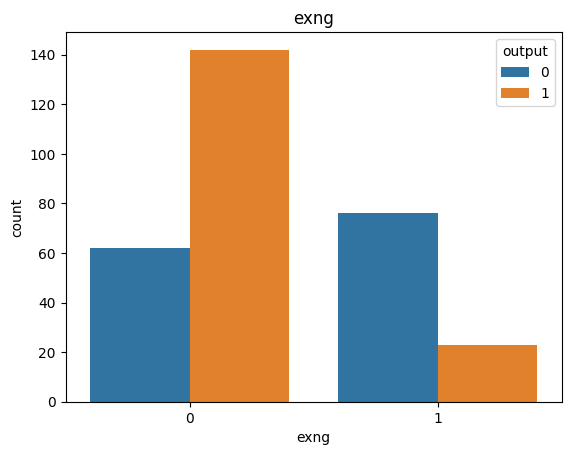

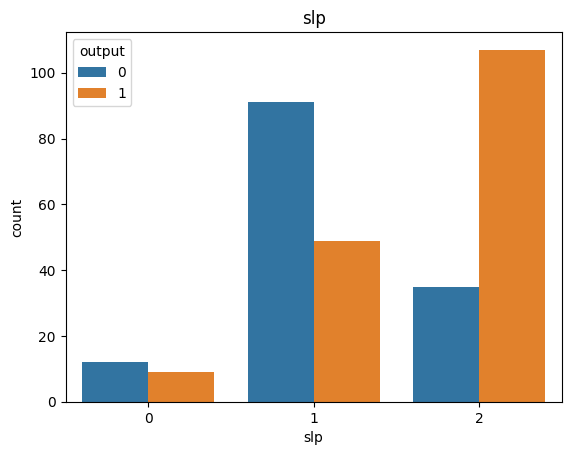

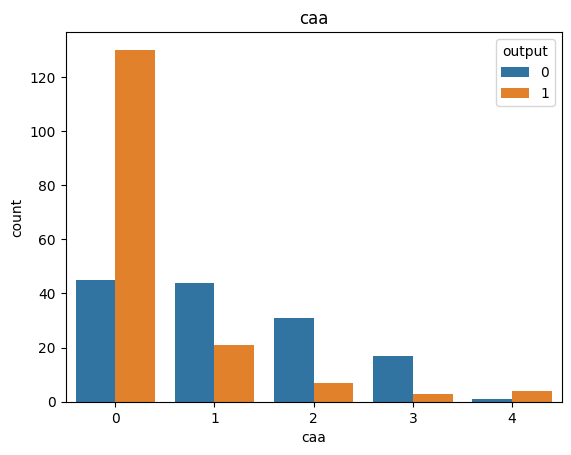

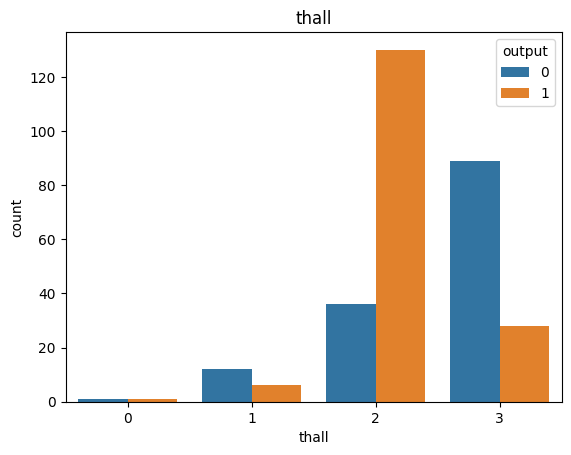

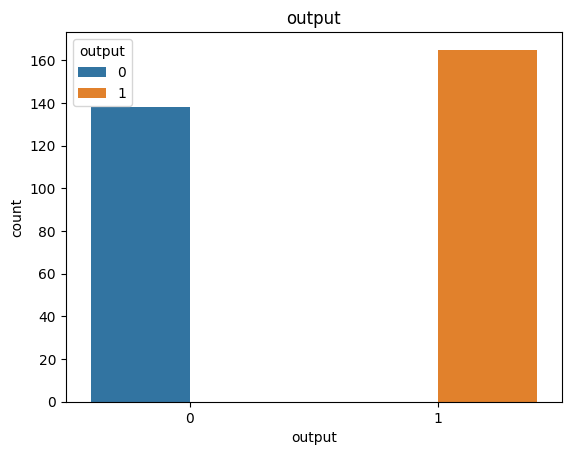

In [10]:
#visualization of selected features with countplot
df_categoric = df.loc[:, categorical_features]
for i in categorical_features:
    plt.figure()
    sns.countplot(x=i, data=df_categoric, hue= "output")
    plt.title(i)

* Blue columns indicate a low probability of having a heart attack, and orange columns indicate a high probability of having a heart attack.
* For the first graph, people with gender 0 are more likely to have a heart attack, while people with gender 1 are less likely to have a heart attack.
* For the second graph, individuals whose cp value is shown as 0 in the graph (corresponding to value 1) are less likely to have a heart attack, while individuals whose cp value is 2, 3 and 4 are more likely to have a heart attack.

<a id='7'></a>
## 7- Numeric Feature Analysis
* Bivariate data analysis with scatter plot

In [11]:
#put together numeric features
numeric_features = ["age", "trtbps","chol","thalachh","oldpeak","output"]

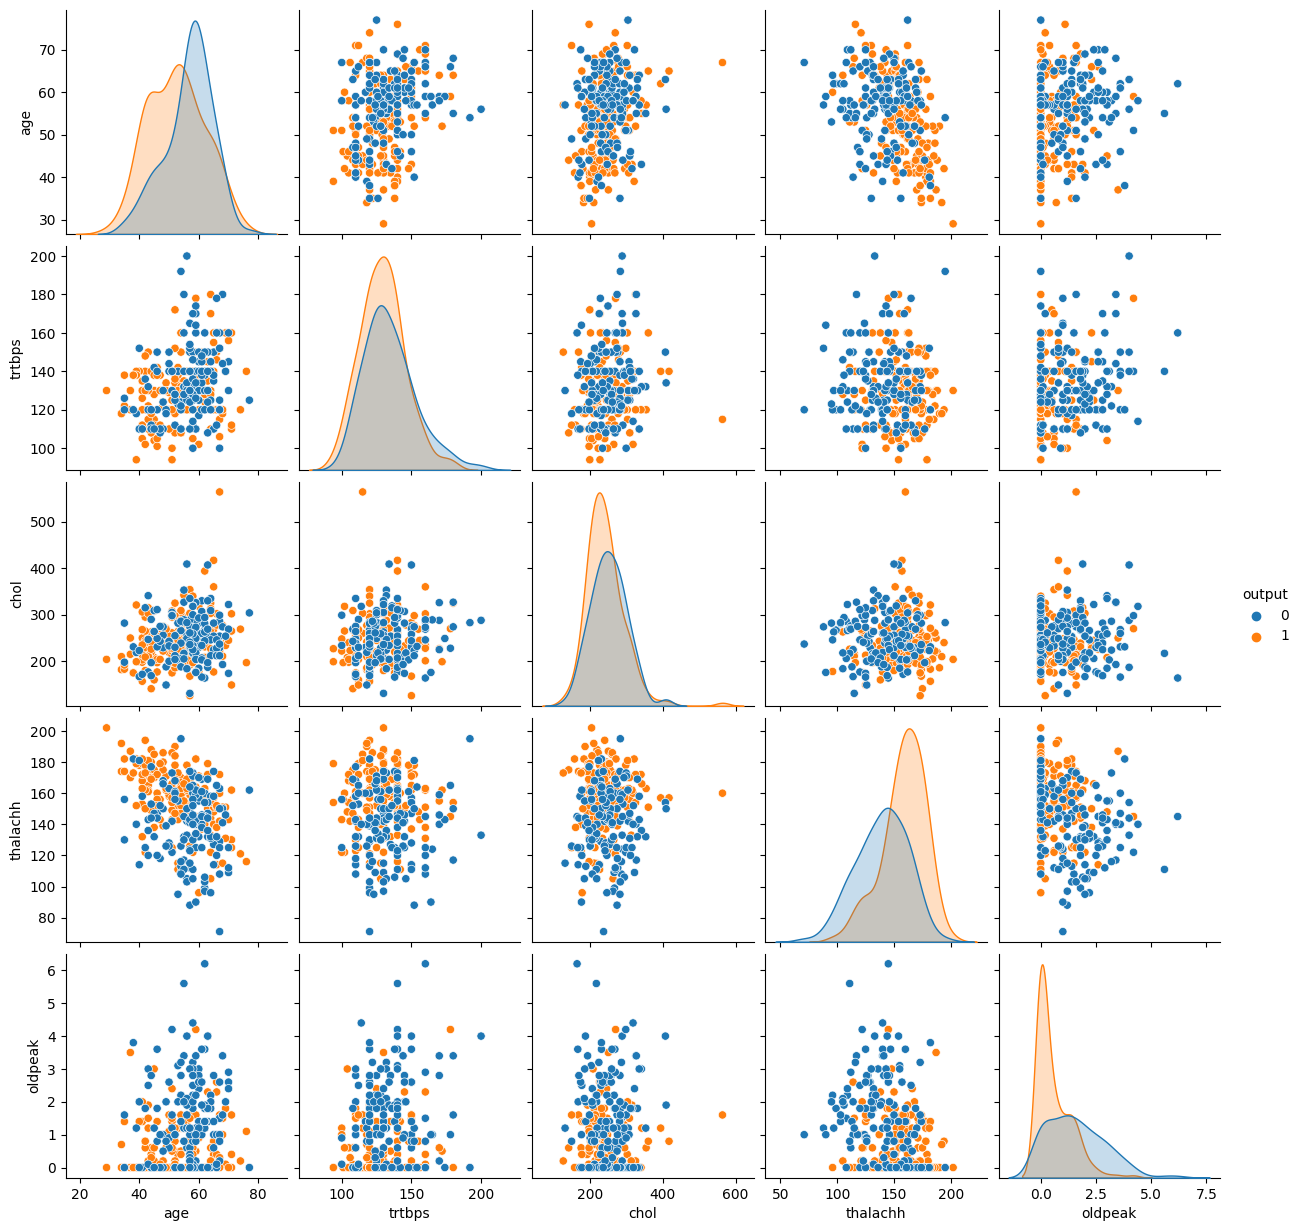

In [12]:
df_numeric = df.loc[:, numeric_features]
sns.pairplot(df_numeric, hue = "output", diag_kind = "kde")
plt.show()

* There appears to be a negative correlation between age and thalachh features. While the blue colors are concentrated in the upper left of the graph, the orange dots are concentrated in the lower right. This shows that individuals with high thalachh values are younger and more likely to have a heart attack. As the value of the age variable increases, the thalachh value decreases.

<a id='8'></a>
## 8- Standardization
* Purpose: Making the data have a mean of 0 and a standard deviation of 1. It facilitates visualization and allows better training of the ml algorithm.

In [13]:
scaler = StandardScaler()
scaler

StandardScaler()

In [14]:
scaled_array = scaler.fit_transform(df[numeric_features[:-1]]) #doesn't include "output"
scaled_array                        

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [15]:
pd.DataFrame(scaled_array).describe()

,0,1,2,3,4
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-7.035077e-16,-1.113887e-16,-6.800574e-16,2.345026e-17
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


<a id='9'></a>
## 9- Box Plot Analysis
* Distribution of each feature according to the output

In [16]:
df_dummy = pd.DataFrame(scaled_array, columns = numeric_features[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [17]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]], axis=1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [18]:
data_melted = pd.melt(df_dummy, id_vars = "output", var_name = "features", value_name = "value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


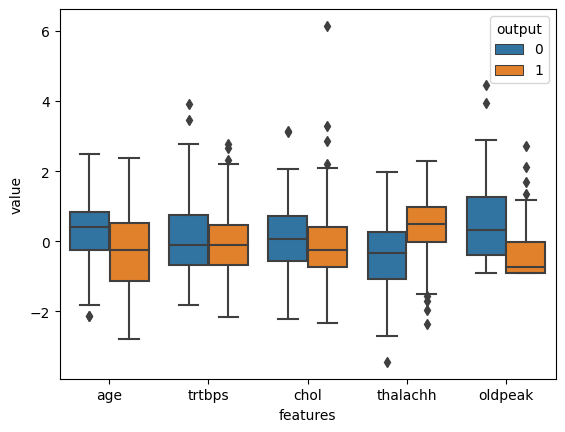

In [19]:
#visualization with box plot
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

<a id='10'></a>
## 10- Swarm Plot Analysis
* Distribution for each individual

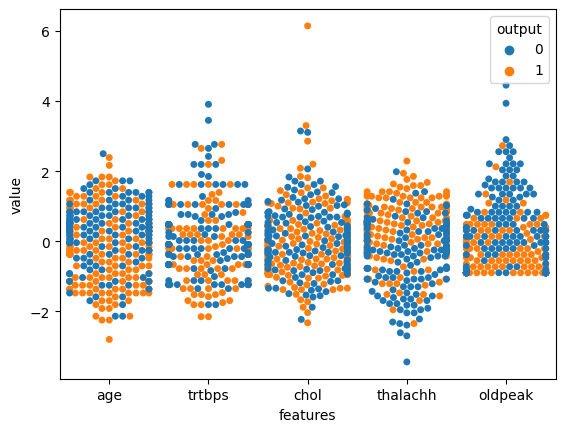

In [20]:
plt.figure()
sns.swarmplot(x = "features", y = "value", hue = "output", data= data_melted)
plt.show()

* Compared to the first 3 features, there is not much confusion between the last 2 features.

<a id='11'></a>
## 11- Cat Plot Analysis

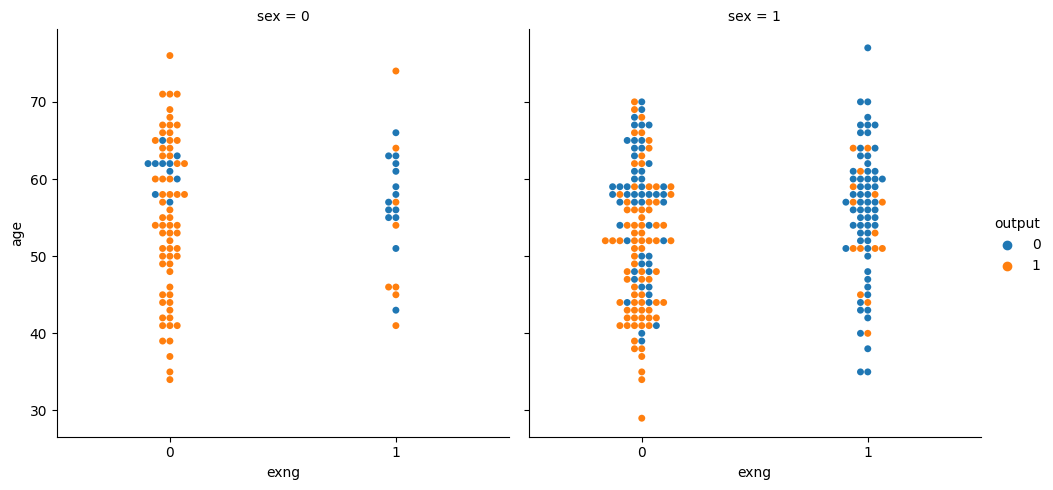

In [21]:
#effect of age feature on exng feature
sns.catplot(x = "exng", y = "age", hue = "output", col = "sex", kind = "swarm", data = df)
plt.show()

<a id='12'></a>
## 12- Correlation Analysis

In [22]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


* If the correlation between the features is 1, these two features are 100% directly proportional to each other, -1 means 100% inversely proportional, and 0 means there is no relationship between the features.

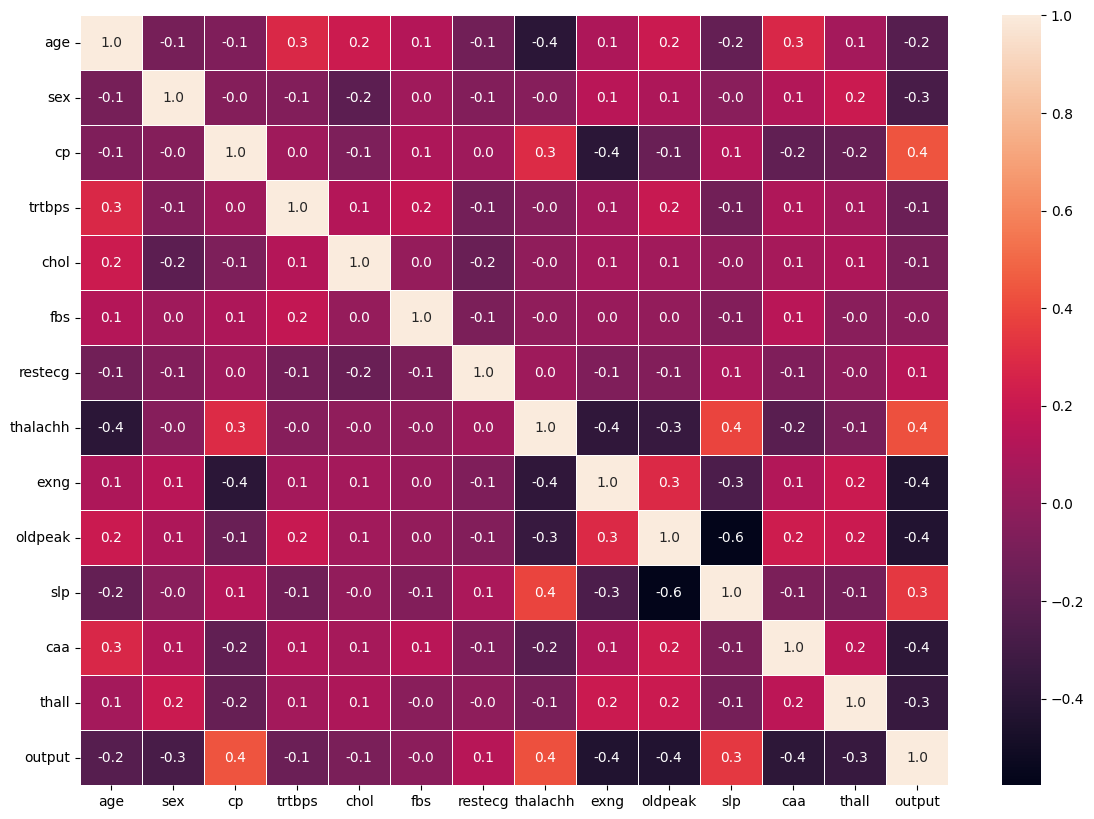

In [23]:
#visualization of correlation with heatmap
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

<a id='13'></a>
## 13- Outlier Detection
* Outliers can disrupt Ml processes.

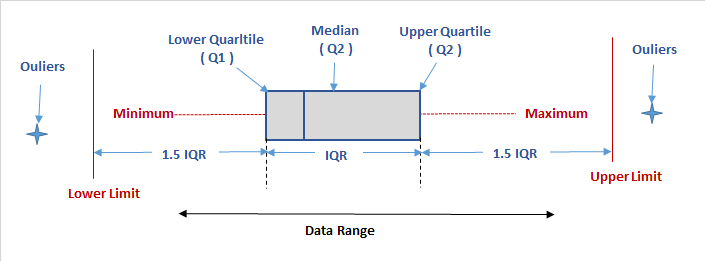

In [24]:
numeric_list = ["age", "trtbps","chol","thalachh","oldpeak"]
df_numeric = df.loc[:, numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [25]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [26]:
#outlier detection
for i in numeric_list:
    
    # IQR
    Q1 = np.percentile(df.loc[:, i],25)
    Q3 = np.percentile(df.loc[:, i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape) #before dropping outliers
    
    # upper bound
    upper = np.where(df.loc[:, i] >= (Q3 +2.5*IQR))
                                                       #outliers
    # lower bound
    lower = np.where(df.loc[:, i] <= (Q1 - 2.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace = True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
    
    try:
        df.drop(lower[0], inplace = True)
    except:  print("KeyError: {} not found in axis".format(lower[0]))
        
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([223, 248]),) -- (array([], dtype=int64),)
New shape:  (301, 14)
Old shape:  (301,)
(array([85]),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (300, 14)
Old shape:  (300,)
(array([203, 220]),) -- (array([], dtype=int64),)
New shape:  (298, 14)


* First shape was 303 which means there was 303 individuals. After outlier detection, 5 outliers were removed and latest shape has 298 individuals.

<a id='14'></a>
## 14- Modelling

In [27]:
df1 = df.copy()

<a id='14.1'></a>
### 14.1- Encoding Categorical Columns

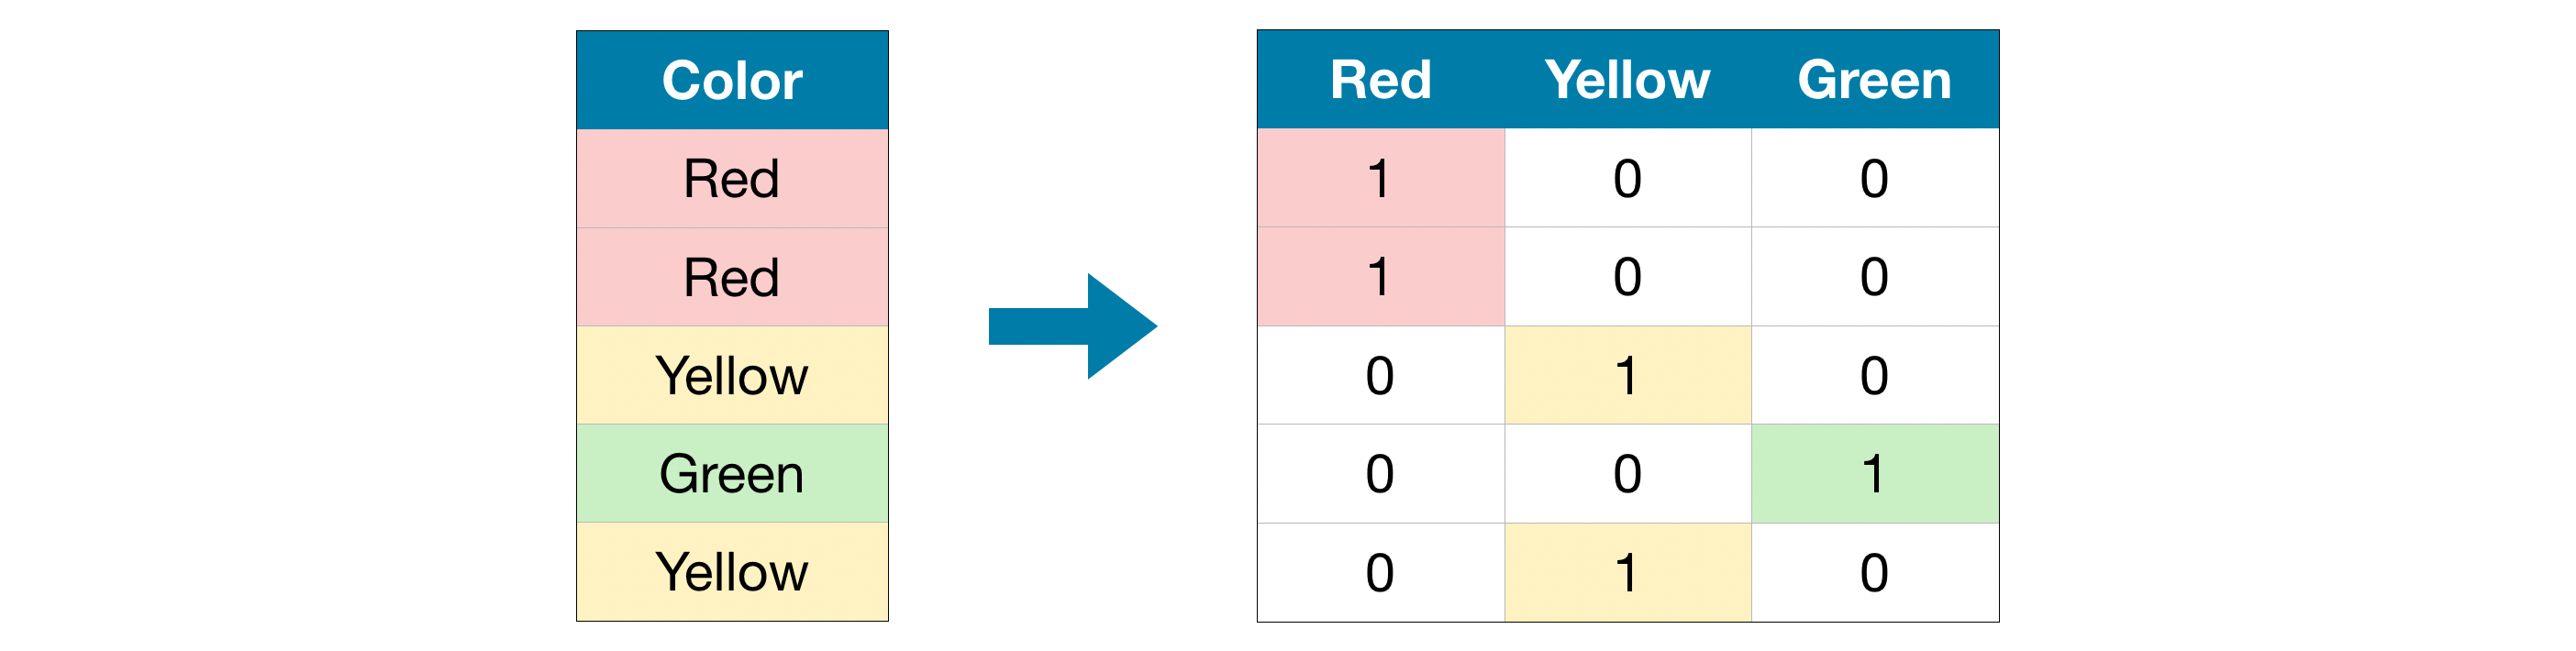

In [28]:
categorical_features

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [29]:
#since "output" was last in the categorical_features list, other features were encoded except for it
df1 = pd.get_dummies(df1, columns = categorical_features[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


In [30]:
X = df1.drop(["output"], axis = 1) #features
y = df1[["output"]] #target

<a id='14.2'></a>
### 14.2- Scaling
* Standardization of numerical features

In [31]:
scaler = StandardScaler()
scaler

StandardScaler()

In [32]:
X[numeric_features[:-1]] = scaler.fit_transform(X[numeric_features[:-1]])

In [33]:
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,1.122573,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,-1.902555,-0.061886,0.119326,1.639116,2.174545,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-1.461254,-0.061886,-0.843995,0.983470,0.333595,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,0.193624,-0.666538,-0.173859,1.245729,-0.192391,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,0.303950,-0.666538,2.297269,0.590082,-0.367719,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False


<a id='14.3'></a>
### 14.3- Train-Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


<a id='14.4'></a>
### 14.4- Logistic Regression
* Since this dataset has a binary classification problem, we use Logistic Regression model.

In [35]:
logreg = LogisticRegression()
logreg

LogisticRegression()

In [36]:
#training the model
logreg = logreg.fit(X_train, y_train)
logreg

LogisticRegression()

In [37]:
# calculate probabilities
y_pred_prob = logreg.predict_proba(X_test)
y_pred_prob

array([[0.94233115, 0.05766885],
       [0.06993771, 0.93006229],
       [0.11269419, 0.88730581],
       [0.48053025, 0.51946975],
       [0.08755233, 0.91244767],
       [0.0196922 , 0.9803078 ],
       [0.01314518, 0.98685482],
       [0.25620134, 0.74379866],
       [0.93047349, 0.06952651],
       [0.04682247, 0.95317753],
       [0.95711593, 0.04288407],
       [0.01125421, 0.98874579],
       [0.41868871, 0.58131129],
       [0.60513666, 0.39486334],
       [0.02731465, 0.97268535],
       [0.02622112, 0.97377888],
       [0.84077411, 0.15922589],
       [0.0360213 , 0.9639787 ],
       [0.86086049, 0.13913951],
       [0.97595023, 0.02404977],
       [0.62139422, 0.37860578],
       [0.31050689, 0.68949311],
       [0.93471582, 0.06528418],
       [0.00475145, 0.99524855],
       [0.44467394, 0.55532606],
       [0.3391953 , 0.6608047 ],
       [0.03959393, 0.96040607],
       [0.99151756, 0.00848244],
       [0.46829421, 0.53170579],
       [0.69650684, 0.30349316]])

In [38]:
y_pred = np.argmax(y_pred_prob, axis = 1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0])

In [39]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head()

,0,1,y_pred
0,0.942331,0.057669,0
1,0.069938,0.930062,1
2,0.112694,0.887306,1
3,0.480530,0.519470,1
4,0.087552,0.912448,1


In [40]:
#accuracy score
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9


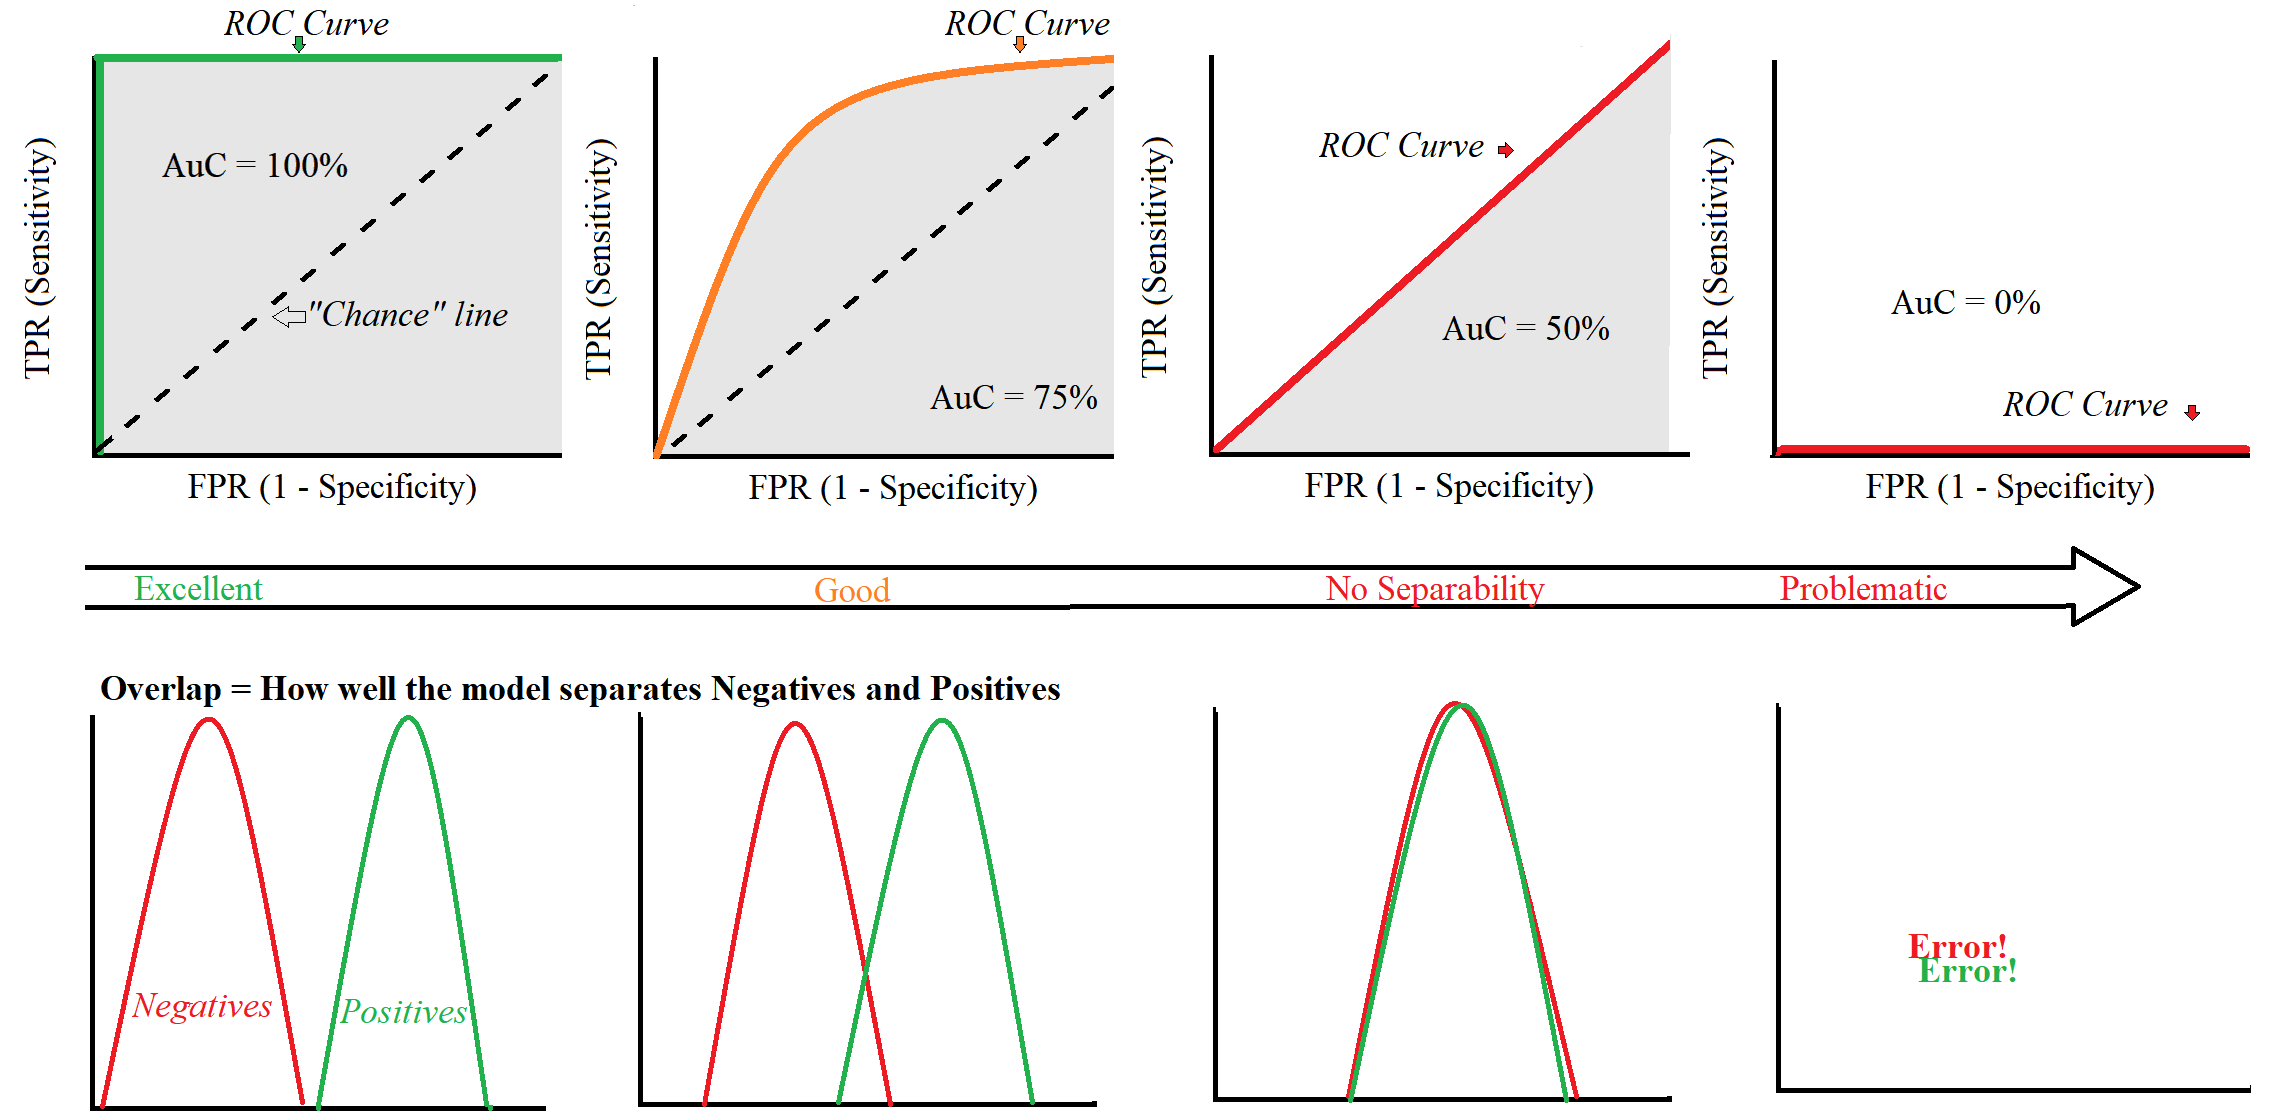

In [41]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

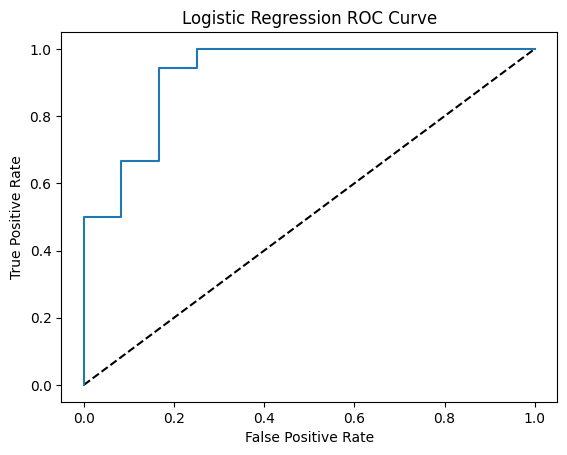

In [42]:
# plot curve
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

<a id='14.5'></a>
### 14.5- Logistic Regression Hyperparameter Tuning

In [43]:
lr = LogisticRegression()
lr

LogisticRegression()

In [44]:
penalty = ["l1", "l2"]
parameters = {"penalty": penalty}

In [45]:
lr_searcher = GridSearchCV(lr, parameters)

In [46]:
lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [47]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [48]:
y_pred = lr_searcher.predict(X_test)

In [49]:
print("Test accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test accuracy: 0.9
